TRYING OUR DEEP-Q LEARNING MODEL ON SPACE INVADERS ENVIRONMENT

In [1]:
!pip install gymnasium stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 14.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuspa

In [2]:
import gymnasium
import random

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

env = gymnasium.make('SpaceInvaders-v0')
env.reset()
for _ in range(1, 20+1):
  state = env.reset()
  done = False
  score = 0

  while not done:
    action = random.choice([0,1,2,3,4,5])
    n_state, reward, done, info, _= env.step(action)
    score+=reward
  print(f"Episode: {_} Score: {score}")
env.close()

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment SpaceInvaders-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


Episode: {'lives': 0, 'episode_frame_number': 3303, 'frame_number': 3303} Score: 270.0
Episode: {'lives': 0, 'episode_frame_number': 2945, 'frame_number': 6248} Score: 215.0
Episode: {'lives': 0, 'episode_frame_number': 1979, 'frame_number': 8227} Score: 110.0
Episode: {'lives': 0, 'episode_frame_number': 2471, 'frame_number': 10698} Score: 390.0
Episode: {'lives': 0, 'episode_frame_number': 2105, 'frame_number': 12803} Score: 120.0
Episode: {'lives': 0, 'episode_frame_number': 2227, 'frame_number': 15030} Score: 185.0
Episode: {'lives': 0, 'episode_frame_number': 2897, 'frame_number': 17927} Score: 415.0
Episode: {'lives': 0, 'episode_frame_number': 2385, 'frame_number': 20312} Score: 210.0
Episode: {'lives': 0, 'episode_frame_number': 2451, 'frame_number': 22763} Score: 210.0
Episode: {'lives': 0, 'episode_frame_number': 2461, 'frame_number': 25224} Score: 150.0
Episode: {'lives': 0, 'episode_frame_number': 1617, 'frame_number': 26841} Score: 105.0
Episode: {'lives': 0, 'episode_fram

In [3]:
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv
import gymnasium

model = PPO("MlpPolicy",env, verbose=2)
model.learn(total_timesteps=10000)
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=30)
model.save("SpaceInvaders")
print(f"Mean reward: {mean_reward:.2f}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 580      |
|    ep_rew_mean     | 108      |
| time/              |          |
|    fps             | 137      |
|    iterations      | 1        |
|    time_elapsed    | 14       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 712         |
|    ep_rew_mean          | 225         |
| time/                   |             |
|    fps                  | 148         |
|    iterations           | 2           |
|    time_elapsed         | 27          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009999655 |
|    clip_fraction        | 0.0725      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.79       |
|    explained_variance   | 0.00631     |
|    learning_rate        | 0.

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 218.67


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment SpaceInvaders-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


Using cuda device
Wrapping the env in a VecTransposeImage.
-----------------------------
| time/              |      |
|    fps             | 314  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 2048 |
-----------------------------
Mean reward after 1000 timesteps: 198.17
-----------------------------
| time/              |      |
|    fps             | 357  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 4096 |
-----------------------------
Mean reward after 2000 timesteps: 234.00
-----------------------------
| time/              |      |
|    fps             | 310  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 6144 |
-----------------------------
Mean reward after 3000 timesteps: 215.17
-----------------------------
| time/              |      |
|    fps             | 370  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 8192 |
--------

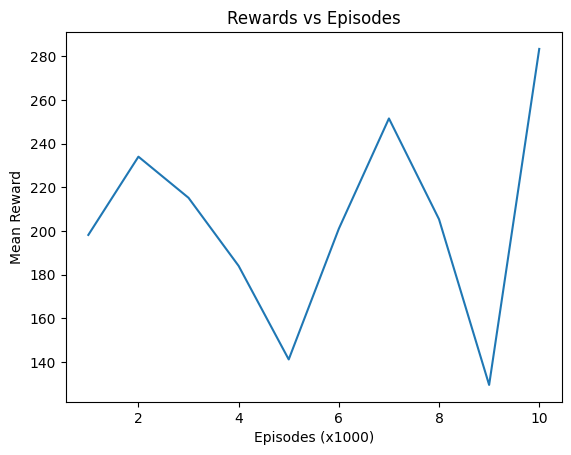

Final mean reward: 350.17


In [4]:
import gymnasium as gym
import random
import matplotlib.pyplot as plt

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv

# Create the environment
env = gym.make('SpaceInvaders-v0')
env = DummyVecEnv([lambda: env])  # Wrap the environment

# Initialize the PPO model with MLP policy
model = PPO("MlpPolicy", env, verbose=2)

# Train the model
timesteps = 30000
reward_history = []

for i in range(1, timesteps // 1000 + 1):
    model.learn(total_timesteps=1000, reset_num_timesteps=False)

    # Evaluate the policy
    mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=30)
    reward_history.append(mean_reward)
    print(f"Mean reward after {i * 1000} timesteps: {mean_reward:.2f}")

# Save the model
model.save("SpaceInvaders_PPO")

# Plot the rewards vs episodes
plt.plot(range(1, len(reward_history) + 1), reward_history)
plt.xlabel('Episodes (x1000)')
plt.ylabel('Mean Reward')
plt.title('Rewards vs Episodes')
plt.show()

# Evaluate final model performance
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=30)
print(f"Final mean reward: {mean_reward:.2f}")


Using cuda device
Wrapping the env in a VecTransposeImage.
-----------------------------
| time/              |      |
|    fps             | 317  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 2048 |
-----------------------------
Mean reward after 1000 timesteps: 10.67
-----------------------------
| time/              |      |
|    fps             | 368  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 4096 |
-----------------------------
Mean reward after 2000 timesteps: 37.83
-----------------------------
| time/              |      |
|    fps             | 319  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 6144 |
-----------------------------
Mean reward after 3000 timesteps: 30.50
-----------------------------
| time/              |      |
|    fps             | 328  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 8192 |
-----------

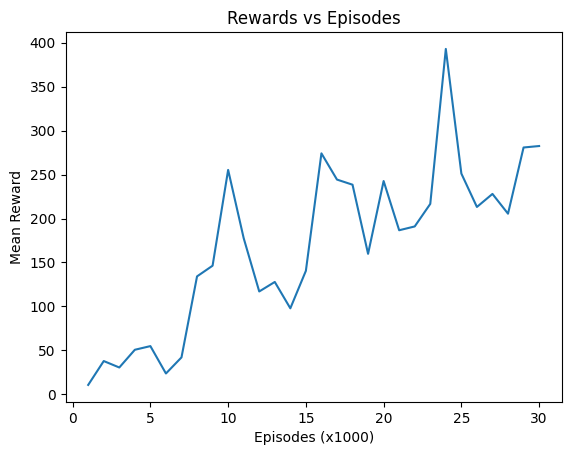

Final mean reward: 301.33


In [9]:
import gymnasium as gym
import random
import matplotlib.pyplot as plt

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv

# Create the environment
env = gym.make('SpaceInvaders-v0')
env = DummyVecEnv([lambda: env])  # Wrap the environment

# Initialize the PPO model with MLP policy
model = PPO("MlpPolicy", env, verbose=2)

# Train the model
timesteps = 30000
reward_history = []

for i in range(1, timesteps // 1000 + 1):
    model.learn(total_timesteps=1000, reset_num_timesteps=False)

    # Evaluate the policy
    mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=30)
    reward_history.append(mean_reward)
    print(f"Mean reward after {i * 1000} timesteps: {mean_reward:.2f}")

# Save the model
model.save("SpaceInvaders_PPO")

# Plot the rewards vs episodes
plt.plot(range(1, len(reward_history) + 1), reward_history)
plt.xlabel('Episodes (x1000)')
plt.ylabel('Mean Reward')
plt.title('Rewards vs Episodes')
plt.show()

# Evaluate final model performance
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=30)
print(f"Final mean reward: {mean_reward:.2f}")
